<a href="https://colab.research.google.com/github/micazev/GoogleEarthEngine_Santarem/blob/main/AnalisesSR_IC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dados disponíveis para download, [clique aqui](https://drive.google.com/drive/folders/1XFUEtfm1HO7P7W6nzhYd9dA31lcGpZWR?usp=sharing).

In [1]:
!pip install rasterio

In [2]:
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Funções

In [3]:
# A função para calcular as porcentagens das classes
def calculate_class_percentages(class_array):
    unique_classes, counts = np.unique(class_array, return_counts=True)
    total_pixels = class_array.size
    percentages = (counts / total_pixels) * 100
    return dict(zip(unique_classes, percentages))

In [4]:
# DataFrame para armazenar resultados
df_LANDSAT_classes = pd.DataFrame(columns=['Year', 'Water', 'Vegetation', 'Built_Area'])
df_SENTINEL_classes = pd.DataFrame(columns=['Year', 'Water', 'Vegetacao_Herbacea', 'Built_Area', 'Solo_Exposto', 'Vegetacao_Arborea'])

# Dados

In [11]:
# Baixar dados LANDSAT
# Anos de interesse
years_of_interest_landsat = [i for i in range(2002, 2022) if i not in [2012, 2013]]

# Dicionário para armazenar arrays
landsat_classified_data = {}

# Loop pelos anos
for year in years_of_interest_landsat:
    try:
        with rasterio.open(f'/content/drive/MyDrive/IC/imagens santarem landsat/Santarem_LandsatClassificacao_{year}.tif') as src:
            # Ler o dado e armazenar no dicionário
            landsat_classified_data[year] = src.read(1)
    except FileNotFoundError:
        print(f"Arquivo para o ano {year} não encontrado.")
        continue

In [5]:
# Baixar dados SENTINEL
years_of_interest_sentinel = range(2016, 2023)
sentinel_classified_data = {}

for year in years_of_interest_sentinel:
  try:
    with rasterio.open(f'/content/drive/MyDrive/IC/imagens santarem sentinel/Santarem_Sentinel2Classificacao_{year}.tif') as src:
      sentinel_classified_data[year] = src.read(1)
  except FileNotFoundError:
    print(f"Arquivo para o ano {year} não encontrado.")
    continue

In [30]:
print("Chaves em landsat_classified_data:", landsat_classified_data.keys())
print("Chaves em sentinel_classified_data:", sentinel_classified_data.keys())

Chaves em landsat_classified_data: dict_keys([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])
Chaves em sentinel_classified_data: dict_keys([2016, 2017, 2018, 2019, 2020, 2021, 2022])


In [31]:
# Certificar de que têm a mesma forma
assert landsat_classified_data[2020].shape == sentinel_classified_data[2020].shape

# Análises

<ipython-input-14-e29b397f8654>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_LANDSAT_classes = df_LANDSAT_classes.append({'Year': year,
<ipython-input-14-e29b397f8654>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_LANDSAT_classes = df_LANDSAT_classes.append({'Year': year,
<ipython-input-14-e29b397f8654>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_LANDSAT_classes = df_LANDSAT_classes.append({'Year': year,


Porcentagens da imagem Landsat no ano 2002:
{0: 41.2817749833587, 1: 6.388938318471506, 2: 26.774192485385317, 3: 25.555094212784468}
Porcentagens da imagem Landsat no ano 2003:
{0: 41.2817749833587, 1: 6.283159011671972, 2: 24.719940223158087, 3: 27.715125781811235}
Porcentagens da imagem Landsat no ano 2004:
{0: 41.2817749833587, 1: 6.0245187206305895, 2: 25.852495534861035, 3: 26.841210761149664}


<ipython-input-14-e29b397f8654>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_LANDSAT_classes = df_LANDSAT_classes.append({'Year': year,
<ipython-input-14-e29b397f8654>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_LANDSAT_classes = df_LANDSAT_classes.append({'Year': year,
<ipython-input-14-e29b397f8654>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_LANDSAT_classes = df_LANDSAT_classes.append({'Year': year,


Porcentagens da imagem Landsat no ano 2005:
{0: 41.2817749833587, 1: 8.949967376475474, 2: 24.929768801365572, 3: 24.838488838800245}
Porcentagens da imagem Landsat no ano 2006:
{0: 41.2817749833587, 1: 6.985800528567003, 2: 25.598015567023218, 3: 26.134408921051072}
Porcentagens da imagem Landsat no ano 2007:
{0: 41.2817749833587, 1: 8.339388457203867, 2: 21.94331580230803, 3: 28.435520757129396}


<ipython-input-14-e29b397f8654>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_LANDSAT_classes = df_LANDSAT_classes.append({'Year': year,
<ipython-input-14-e29b397f8654>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_LANDSAT_classes = df_LANDSAT_classes.append({'Year': year,
<ipython-input-14-e29b397f8654>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_LANDSAT_classes = df_LANDSAT_classes.append({'Year': year,


Porcentagens da imagem Landsat no ano 2008:
{0: 41.2817749833587, 1: 6.4826073775299715, 2: 28.62380627557981, 3: 23.611811363531512}
Porcentagens da imagem Landsat no ano 2009:
{0: 41.2817749833587, 1: 8.955445821882147, 2: 23.62231514983754, 3: 26.1404640449216}
Porcentagens da imagem Landsat no ano 2010:
{0: 41.2817749833587, 1: 9.365670166281117, 2: 22.2843799223626, 3: 27.068174927997575}


<ipython-input-14-e29b397f8654>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_LANDSAT_classes = df_LANDSAT_classes.append({'Year': year,
<ipython-input-14-e29b397f8654>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_LANDSAT_classes = df_LANDSAT_classes.append({'Year': year,
<ipython-input-14-e29b397f8654>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_LANDSAT_classes = df_LANDSAT_classes.append({'Year': year,
<ipython-input-14-e29b397f8654>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_LANDSAT_classes = df_LANDSAT_classes.append({'Year': year,
<ipython-input-14-e29b397f8654>:6: FutureWarning: The frame.append metho

Porcentagens da imagem Landsat no ano 2011:
{0: 41.2817749833587, 1: 7.559389643513851, 2: 22.309259478946295, 3: 28.84957589418115}
Porcentagens da imagem Landsat no ano 2014:
{0: 41.2817749833587, 1: 6.132645932604412, 2: 21.315230572526378, 3: 31.270348511510505}
Porcentagens da imagem Landsat no ano 2015:
{0: 41.2817749833587, 1: 6.547030600206945, 2: 20.97589648786339, 3: 31.19529792857096}
Porcentagens da imagem Landsat no ano 2016:
{0: 41.2817749833587, 1: 7.5712527433418355, 2: 20.988377457474083, 3: 30.158594815825374}
Porcentagens da imagem Landsat no ano 2017:
{0: 41.2817749833587, 1: 8.372217938325061, 2: 21.01025004778193, 3: 29.3357570305343}
Porcentagens da imagem Landsat no ano 2018:
{0: 41.2817749833587, 1: 7.462178131034528, 2: 23.984839947011487, 3: 27.271206938595277}
Porcentagens da imagem Landsat no ano 2019:
{0: 41.2817749833587, 1: 8.244318893304598, 2: 23.486177841047642, 3: 26.98772828228905}
Porcentagens da imagem Landsat no ano 2020:
{0: 41.2817749833587, 1:

<ipython-input-14-e29b397f8654>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_LANDSAT_classes = df_LANDSAT_classes.append({'Year': year,
<ipython-input-14-e29b397f8654>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_LANDSAT_classes = df_LANDSAT_classes.append({'Year': year,
<ipython-input-14-e29b397f8654>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_LANDSAT_classes = df_LANDSAT_classes.append({'Year': year,
<ipython-input-14-e29b397f8654>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_LANDSAT_classes = df_LANDSAT_classes.append({'Year': year,


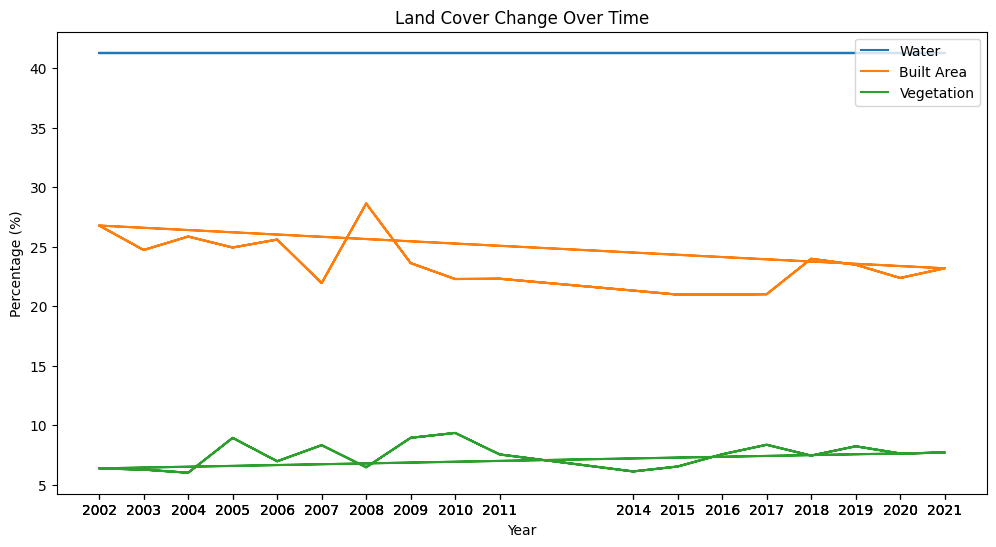

In [14]:
# Calcular porcentagens por ano LANDSAT
for year in years_of_interest_landsat:
    try:
        landsat_percentages = calculate_class_percentages(landsat_classified_data[year])
        # Adicionar os resultados ao DataFrame
        df_LANDSAT_classes = df_LANDSAT_classes.append({'Year': year,
                        'Water': landsat_percentages.get(0, 0),
                        'Vegetation': landsat_percentages.get(1, 0),
                        'Built_Area': landsat_percentages.get(2, 0)}, ignore_index=True)

        print(f"Porcentagens da imagem Landsat no ano {year}:")
        print(landsat_percentages)

    except FileNotFoundError:
        print(f"Arquivo para o ano {year} não encontrado.")
        continue

# Redefinir o índice
df_LANDSAT_classes.reset_index(drop=True, inplace=True)

# Visualização
fig1, ax1 = plt.subplots(1, figsize=(12, 6))
ax1.plot(df_LANDSAT_classes['Year'], df_LANDSAT_classes['Water'], label='Water')
ax1.plot(df_LANDSAT_classes['Year'], df_LANDSAT_classes['Built_Area'], label='Built Area')
ax1.plot(df_LANDSAT_classes['Year'], df_LANDSAT_classes['Vegetation'], label='Vegetation')

# Definição dos rótulos do eixo X para corresponder aos anos
ax1.set_xticks(df_LANDSAT_classes['Year'].astype(int))
ax1.set_title('Land Cover Change Over Time')
ax1.set_xlabel('Year')
ax1.set_ylabel('Percentage (%)')
ax1.legend(loc='upper right')

plt.show()
plt.close('all')

<ipython-input-9-29c6cc9d1852>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_SENTINEL_classes = df_SENTINEL_classes.append({'Year': year,
<ipython-input-9-29c6cc9d1852>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_SENTINEL_classes = df_SENTINEL_classes.append({'Year': year,


Porcentagens da imagem Sentinel no ano 2016:
{0: 41.278973973677104, 1: 7.972785719464051, 2: 9.66097073109648, 3: 25.56378558106122, 4: 0.507641813472527, 5: 15.015842181228622}
Porcentagens da imagem Sentinel no ano 2017:
{0: 41.278973973677104, 1: 7.703724024754336, 2: 10.579784289301461, 3: 25.881329458054058, 4: 0.42299365324159205, 5: 14.133194600971455}


<ipython-input-9-29c6cc9d1852>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_SENTINEL_classes = df_SENTINEL_classes.append({'Year': year,
<ipython-input-9-29c6cc9d1852>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_SENTINEL_classes = df_SENTINEL_classes.append({'Year': year,


Porcentagens da imagem Sentinel no ano 2018:
{0: 41.278973973677104, 1: 7.339551574826503, 2: 8.878047333768313, 3: 24.207561408018137, 4: 0.9904040703613632, 5: 17.305461639348586}
Porcentagens da imagem Sentinel no ano 2019:
{0: 41.278973973677104, 1: 7.602269806433755, 2: 7.650134118934167, 3: 26.958400063269867, 4: 0.7960634280404136, 5: 15.714158609644699}


<ipython-input-9-29c6cc9d1852>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_SENTINEL_classes = df_SENTINEL_classes.append({'Year': year,
<ipython-input-9-29c6cc9d1852>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_SENTINEL_classes = df_SENTINEL_classes.append({'Year': year,
<ipython-input-9-29c6cc9d1852>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_SENTINEL_classes = df_SENTINEL_classes.append({'Year': year,


Porcentagens da imagem Sentinel no ano 2020:
{0: 41.278973973677104, 1: 7.573065161371111, 2: 7.595514430142819, 3: 25.347984261620894, 4: 0.5132850241545894, 5: 17.69117714903349}
Porcentagens da imagem Sentinel no ano 2021:
{0: 41.278973973677104, 1: 7.448090699988796, 2: 6.991938035075232, 3: 25.708943788678653, 4: 0.5630441373219711, 5: 18.00900936525825}
Porcentagens da imagem Sentinel no ano 2022:
{0: 41.278973973677104, 1: 7.746521805036545, 2: 7.325917248288088, 3: 26.633235792290304, 4: 0.4903414595567155, 5: 16.52500972115125}


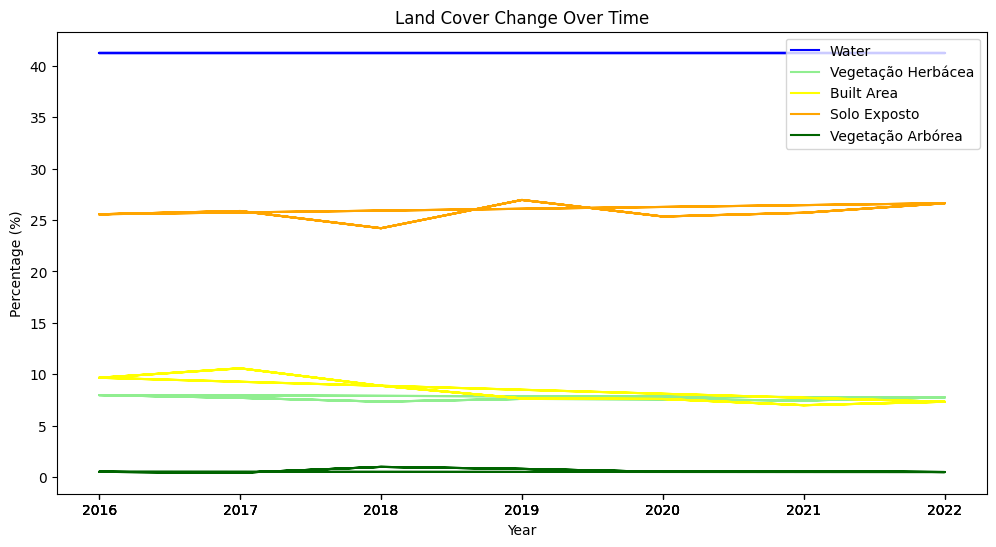

In [9]:
# Calcular porcentagens por ano SENTINEL
for year in years_of_interest_sentinel:
    try:
        percentages = calculate_class_percentages(sentinel_classified_data[year])
        # Adicionar os resultados ao DataFrame
        df_SENTINEL_classes = df_SENTINEL_classes.append({'Year': year,
            'Water': percentages.get(0, 0),
            'Vegetacao_Herbacea': percentages.get(1, 0),
            'Built_Area': percentages.get(2, 0),
            'Solo_Exposto': percentages.get(3, 0),
            'Vegetacao_Arborea': percentages.get(4, 0)}, ignore_index=True)

        print(f"Porcentagens da imagem Sentinel no ano {year}:")
        print(percentages)

    except FileNotFoundError:
        print(f"Arquivo para o ano {year} não encontrado.")
        continue

# Visualização
fig2, ax2 = plt.subplots(figsize=(12, 6))

ax2.plot(df_SENTINEL_classes['Year'], df_SENTINEL_classes['Water'], label='Water', color='blue')
ax2.plot(df_SENTINEL_classes['Year'], df_SENTINEL_classes['Vegetacao_Herbacea'], label='Vegetação Herbácea', color='lightgreen')
ax2.plot(df_SENTINEL_classes['Year'], df_SENTINEL_classes['Built_Area'], label='Built Area', color='yellow')
ax2.plot(df_SENTINEL_classes['Year'], df_SENTINEL_classes['Solo_Exposto'], label='Solo Exposto', color='orange')
ax2.plot(df_SENTINEL_classes['Year'], df_SENTINEL_classes['Vegetacao_Arborea'], label='Vegetação Arbórea', color='darkgreen')

ax2.set_xticks(df_SENTINEL_classes['Year'].astype(int))
ax2.set_title('Land Cover Change Over Time')
ax2.set_xlabel('Year')
ax2.set_ylabel('Percentage (%)')
ax2.legend(loc='upper right')

plt.show()
plt.close('all')
